In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib notebook

In [2]:
# Read the csv file
# Some paths

#rootPath = '/Users/frederictheunissen/Code/songephys/'
rootPath = '/Users/frederictheunissen/Google Drive/My Drive/PowerData/'

#dataPath = 'data/birds/'
dataPath = 'birds/'



In [3]:
# Electrode positions
# This is the xy position for electrode numbers 8 to 16 
zf4_5Num = {8: (-1,2), 9: (0,2), 10: (1,2), 11: (3,2), 12: (4,2), 13: (5,2), 14: (6,2), 15: (7,2),
            16: (0,1), 17: (1,1), 18: (2,1), 19: (3,1), 20: (4,1), 21: (6,1), 22: (7,1)}

zf6_7Num = {8: (8,1), 9: (7,1), 10: (6,1), 11: (4,1), 12: (3,1), 13: (2,1), 14: (1,1), 15: (0,1),
            16: (7,2), 17: (6,2), 18: (5,2), 19: (4,2), 20: (3,2), 21: (1,2), 22: (0,2)}

In [4]:
# Read the csv file
electrodeH = pd.read_csv(rootPath + dataPath + 'HerminaGoodUnitsInfo.csv')

In [5]:
np.unique(electrodeH['depth'])

array([ 2. ,  3. ,  4.5,  5. ,  5.5,  6. ,  7. ,  7.5,  8. ,  8.5,  9.5,
       10. , 10.5, 11. , 11.5, 12. ])

In [6]:
nunits = electrodeH.shape[0]

xpos = np.zeros(nunits)  # Medial lateral position
ypos = np.zeros(nunits)  # Rostral caudal postion
region = []
zone = []

for index, row in electrodeH.iterrows():
    if ( (row['birdName'] == "ZF4F") | (row['birdName'] == "ZF5M") ):
        xpos[index] = zf4_5Num[row['electrode']][1]
        ypos[index] = zf4_5Num[row['electrode']][0]
    elif ( (row['birdName'] == "ZF6M") | (row['birdName'] == "ZF7F") ):
        xpos[index] = zf6_7Num[row['electrode']][1]
        ypos[index] = zf6_7Num[row['electrode']][0]
    if (xpos[index] == 1):
        if (row['depth'] < 4):
            region.append("CMM")
            zone.append("CMM-NCM")
        elif (ypos[index] == 0.0) & (row['depth'] >= 6):
            region.append("NCM")
            zone.append("CMM-NCM")
        elif (ypos[index] <= 5.0) &  (row['depth'] >= 9):
            region.append("NCM")
            zone.append("CMM-NCM")
        else:
            region.append("L")
            zone.append("L-CML")
    else:
        if (row['depth'] < 4):
            region.append('CLM')
            zone.append("L-CML")
        elif ((ypos[index] < 3) & (row['depth'] >= 9)):
            region.append('L_NCM')
            zone.append("Border")
        else:
            region.append("L")
            zone.append("L-CML")
        

electrodeH['xpos'] = xpos
electrodeH['ypos'] = ypos
electrodeH['region'] = region
electrodeH['zone'] = zone

In [7]:
electrodeH

,Unnamed: 0,unitName,birdName,depth,electrode,cluster,decodingpcc,selectivityH,selectivityZ,rMean,rMin,rMax,rStd,z,xpos,ypos,region,zone
0,0,ZF4F_2t_190612_101201_goodPlayback-e11-c31.pkl,ZF5M,9.5,10,115,25.980101,0.047651,0.080397,22.554656,-35.0,81.0,16.203165,1.272586,2.0,1.0,L_NCM,Border
1,1,ZF4F_2t_190612_101201_goodPlayback-e16-c66.pkl,ZF4F,2.0,17,55,17.988497,0.069760,0.099178,8.152294,-18.0,73.0,10.661459,0.920148,1.0,1.0,CMM,CMM-NCM
2,2,ZF4F_2t_190612_101201_goodPlayback-e17-c36.pkl,ZF5M,8.0,12,76,17.937830,0.070974,0.103737,2.468599,-4.0,14.0,3.208191,0.729407,2.0,4.0,L,L-CML
3,3,ZF4F_2t_190612_101201_goodPlayback-e17-c38.pkl,ZF7F,7.0,13,0,17.927170,0.186117,0.678361,1.594718,-10.0,23.0,4.217952,0.414690,1.0,2.0,L,L-CML
4,4,ZF4F_2t_190612_101201_goodPlayback-e19-c2.pkl,ZF4F,2.0,11,62,17.566820,0.024578,0.618425,3.368159,-46.0,42.0,11.679969,0.288012,2.0,3.0,CLM,L-CML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,ZF7F_7t_190806_115742_goodPlayback-e17-c31.pkl,ZF6M,2.0,15,32,11.411733,0.068468,0.524894,0.569120,-8.0,11.0,2.299242,0.247303,1.0,0.0,CMM,CMM-NCM
96,96,ZF7F_7t_190806_115742_goodPlayback-e19-c32.pkl,ZF5M,11.0,20,66,11.253594,0.077864,0.475473,-0.272182,-7.0,8.0,1.363807,-0.196279,1.0,4.0,NCM,CMM-NCM
97,97,ZF7F_7t_190806_115742_goodPlayback-e19-c34.pkl,ZF6M,7.5,11,7,11.112370,0.138303,0.324483,0.607692,-20.0,37.0,3.519388,0.184150,1.0,4.0,L,L-CML
98,98,ZF7F_8_5t_190809_133540_goodPlayback-e17-c29.pkl,ZF4F,3.0,12,35,10.659376,0.019704,0.858307,0.223950,-14.0,11.0,2.856264,0.172524,2.0,4.0,CLM,L-CML


In [8]:
regions = np.unique(electrodeH['region'])
zones = np.unique(electrodeH['zone'])

for region in regions:
    print(region, ':', electrodeH.loc[electrodeH['region'] == region].shape[0])

print()
for zone in zones:
    print(zone, ':', electrodeH.loc[electrodeH['zone'] == zone].shape[0])


CLM : 16
CMM : 25
L : 40
L_NCM : 6
NCM : 13

Border : 6
CMM-NCM : 38
L-CML : 56


In [9]:
# Save the data as a csv
electrodeH.to_csv(rootPath + dataPath + 'HerminaGoodUnitsInfoRegion.csv')

<IPython.core.display.Javascript object>


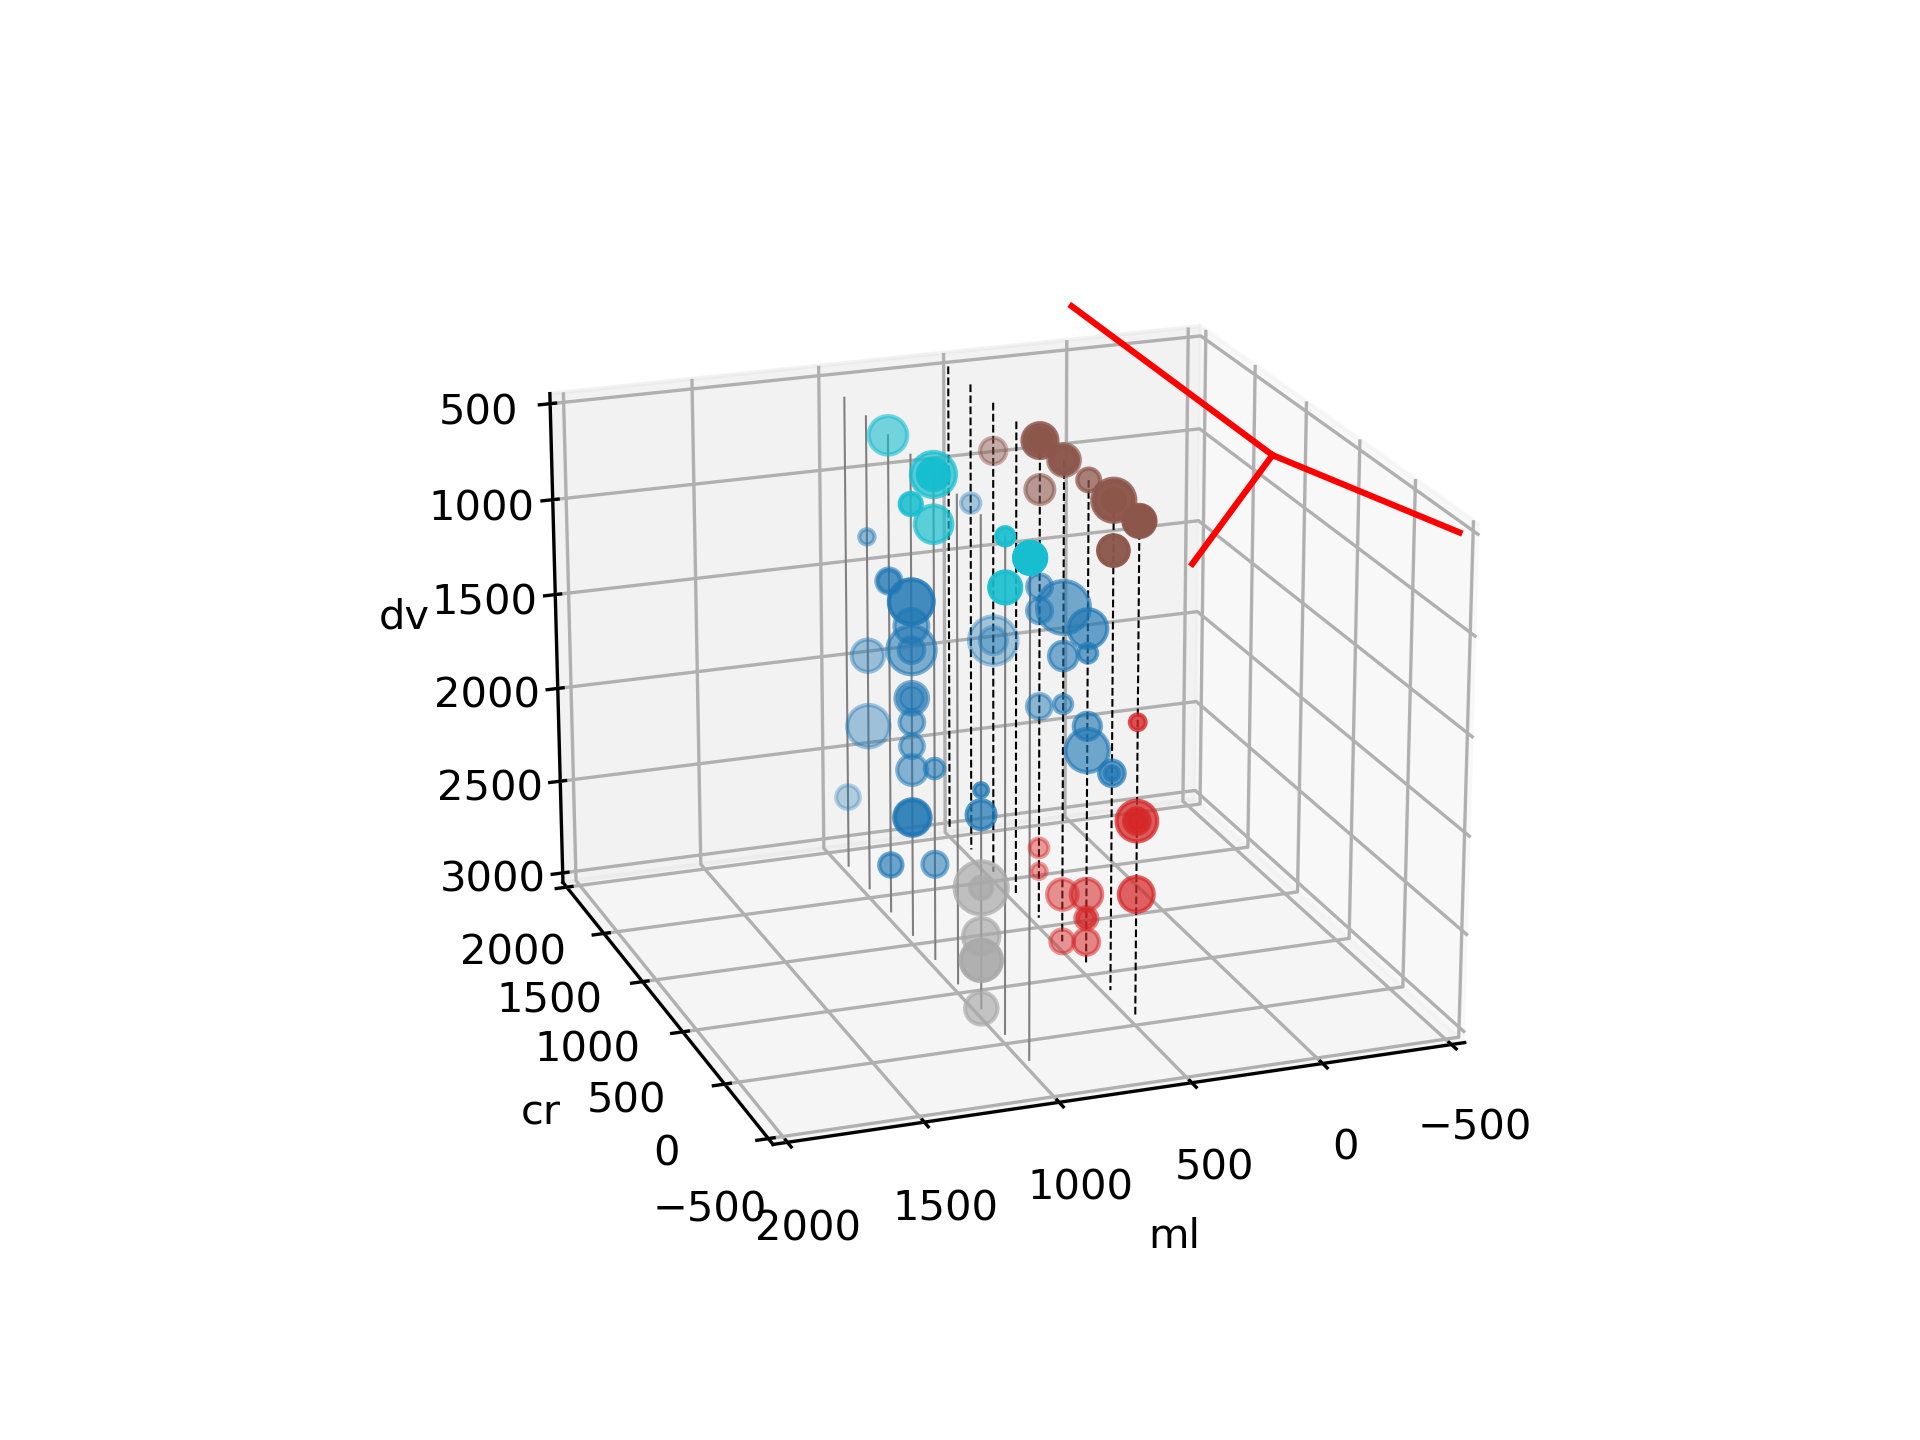

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [10]:
# Make a 3d plot of region vs electrode

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection = '3d')

#cmap = plt.get_cmap('YlOrRd')
cmap = plt.get_cmap('jet')

cdata = []
for index, row in electrodeH.iterrows():
    if row['region'] == 'NCM':
        cdata.append('tab:red')
    elif row['region'] == 'CMM':
        cdata.append('tab:brown')
    elif row['region'] == 'CLM':
        cdata.append("tab:cyan")
    elif row['region'] == "L_NCM":
        cdata.append('darkgray')
    else:
        cdata.append('tab:blue')

ax.scatter(electrodeH['xpos']*500, electrodeH['ypos']*250, electrodeH['depth']*250, s=electrodeH['rStd']*10,
           c = cdata, cmap= cmap)

# Plot the electrodes
for irow in range(2):
    for ipos in range(10):
        if ((irow == 0) & (ipos==0)):
            continue
        if ((irow == 1) & (ipos==9)):
            continue
        if (irow==0):
            ax.plot([500, 500], [(ipos-1)*250, (ipos-1)*250], [500, 3000], 'k--', linewidth=0.5)
        elif (irow==1):
            ax.plot([1000, 1000], [(ipos-1)*250, (ipos-1)*250], [500, 3000], '-', color='grey', linewidth=0.5)

# plot the y sinus
ax.plot([0, 0], [0, 2000], [250, 250], 'r')
ax.plot([0, 500], [0, -500], [250, 500], 'r')
ax.plot([0, -500], [0, -500], [250, 500], 'r')

# Set equal scale
ax.set_xlabel('ml')
ax.set_ylabel('cr')
ax.set_zlabel('dv')
ax.view_init(elev = -160, azim=110)
ax.set(xlim=(-500,2000))
ax.set(ylim=(-500,2000))
ax.set(zlim=(500,3000))

plt.savefig('/Users/frederictheunissen/Desktop/regionvsElectrode.eps')



<IPython.core.display.Javascript object>


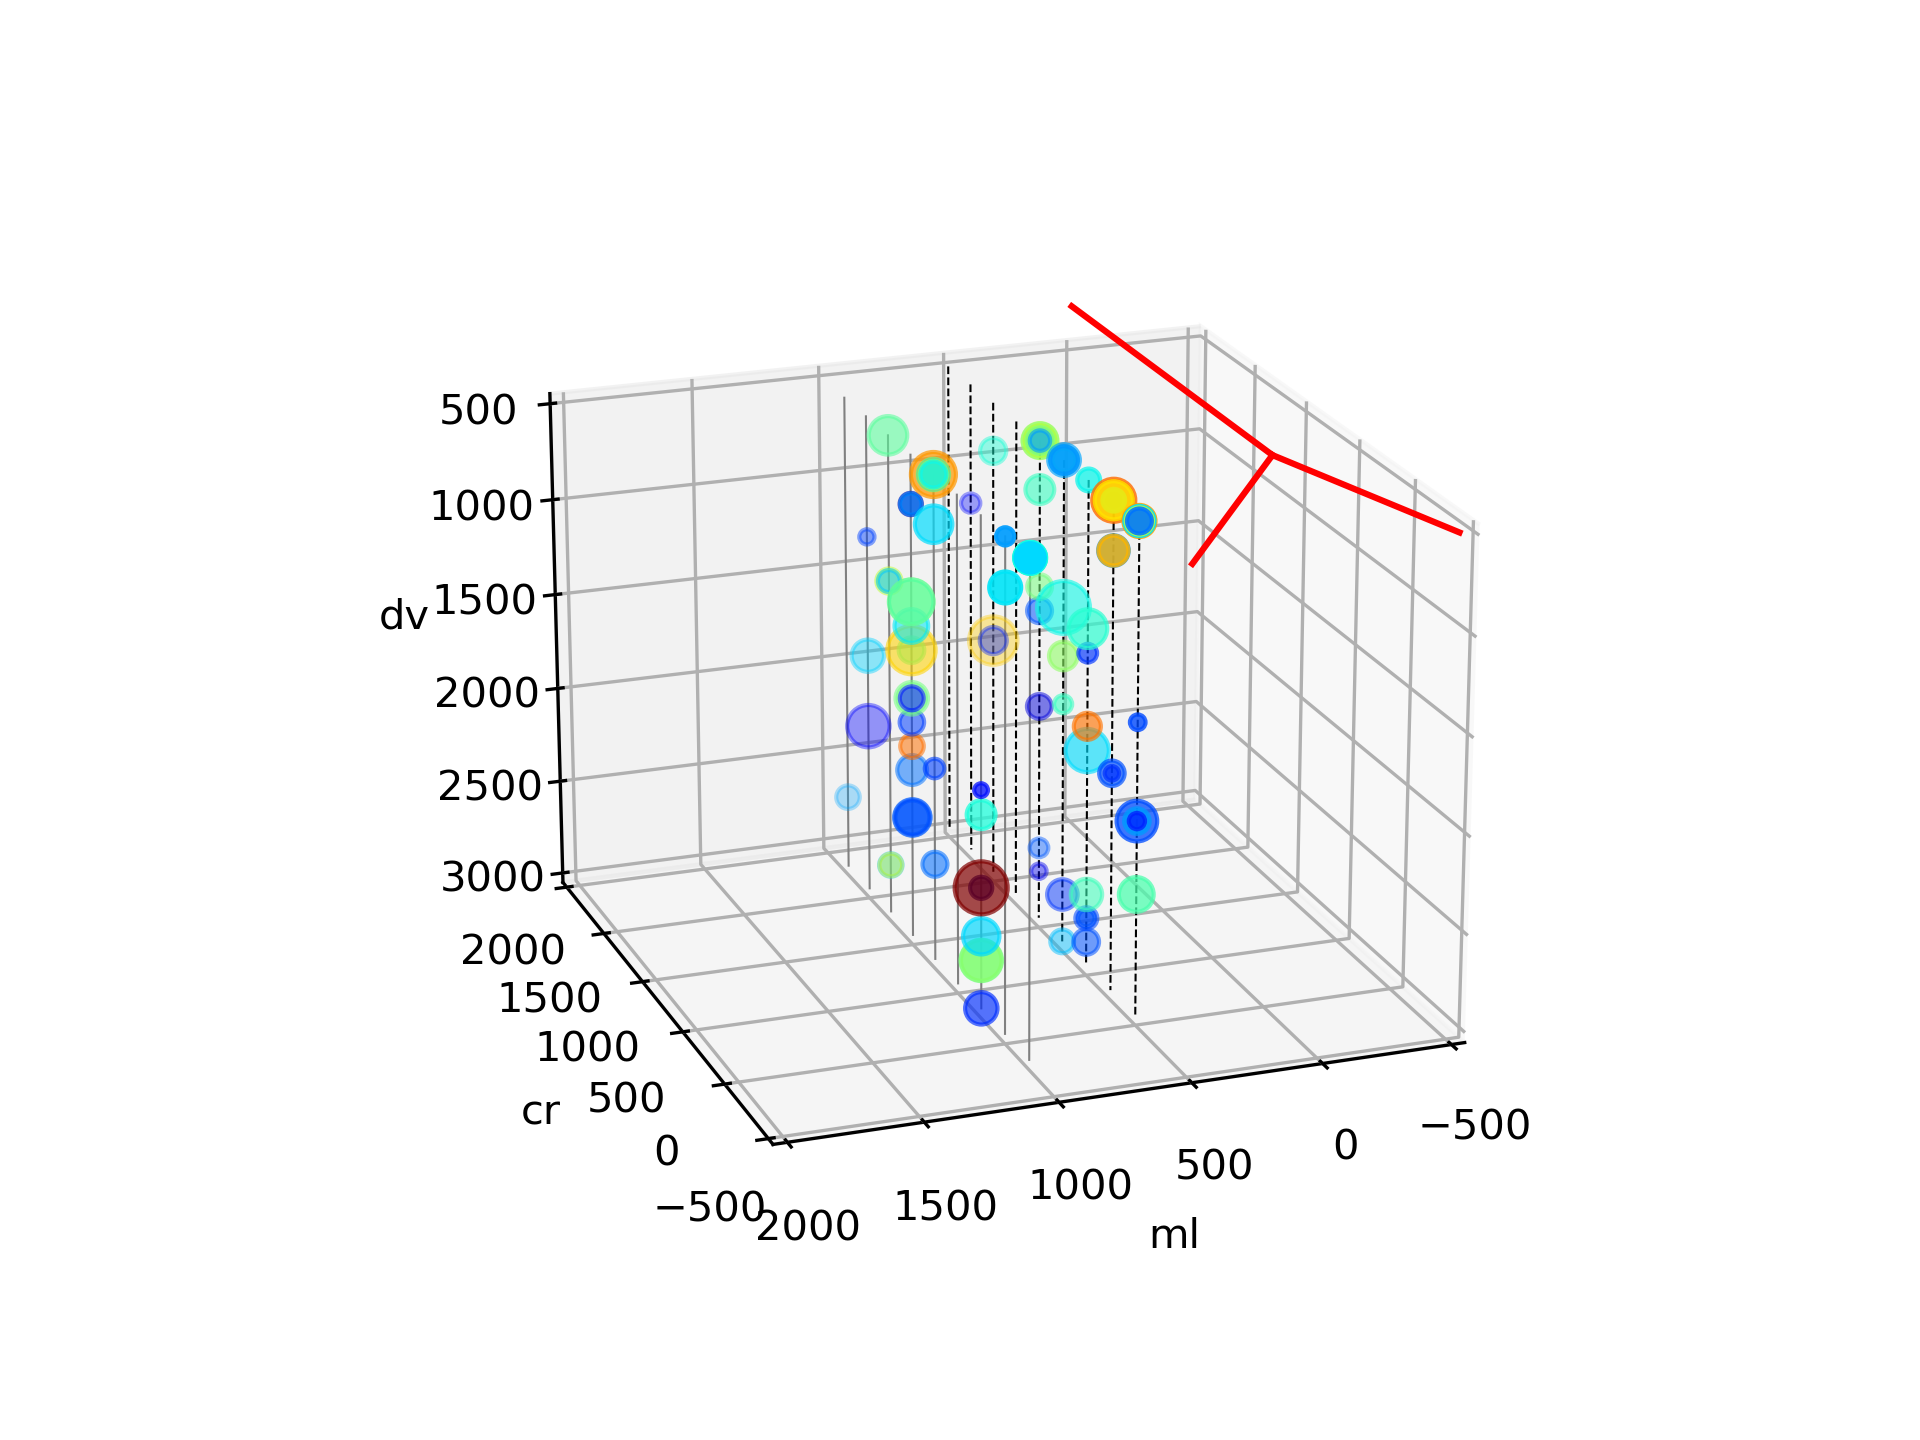

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [11]:
# Make a 3d plot of pcc vs electrode
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection = '3d')

#cmap = plt.get_cmap('YlOrRd')
cmap = plt.get_cmap('jet')

cmin = 10
cmax = 20
cdata = np.array((256*(electrodeH['decodingpcc'].array - cmin)/(cmax-cmin)), dtype=int)
cdata[cdata<0] = 0
cdata[cdata>255] = 255

ax.scatter(electrodeH['xpos']*500, electrodeH['ypos']*250, electrodeH['depth']*250, s=electrodeH['rStd']*10,
           c = cdata, cmap= cmap)

# Plot the electrodes
for irow in range(2):
    for ipos in range(10):
        if ((irow == 0) & (ipos==0)):
            continue
        if ((irow == 1) & (ipos==9)):
            continue
        if (irow==0):
            ax.plot([500, 500], [(ipos-1)*250, (ipos-1)*250], [500, 3000], 'k--', linewidth=0.5)
        elif (irow==1):
            ax.plot([1000, 1000], [(ipos-1)*250, (ipos-1)*250], [500, 3000], '-', color='grey', linewidth=0.5)

# plot the y sinus
ax.plot([0, 0], [0, 2000], [250, 250], 'r')
ax.plot([0, 500], [0, -500], [250, 500], 'r')
ax.plot([0, -500], [0, -500], [250, 500], 'r')

# Set equal scale
ax.set_xlabel('ml')
ax.set_ylabel('cr')
ax.set_zlabel('dv')
ax.view_init(elev = -160, azim=110)
ax.set(xlim=(-500,2000))
ax.set(ylim=(-500,2000))
ax.set(zlim=(500,3000))

plt.savefig('/Users/frederictheunissen/Desktop/pccvsElectrode.eps')


<IPython.core.display.Javascript object>


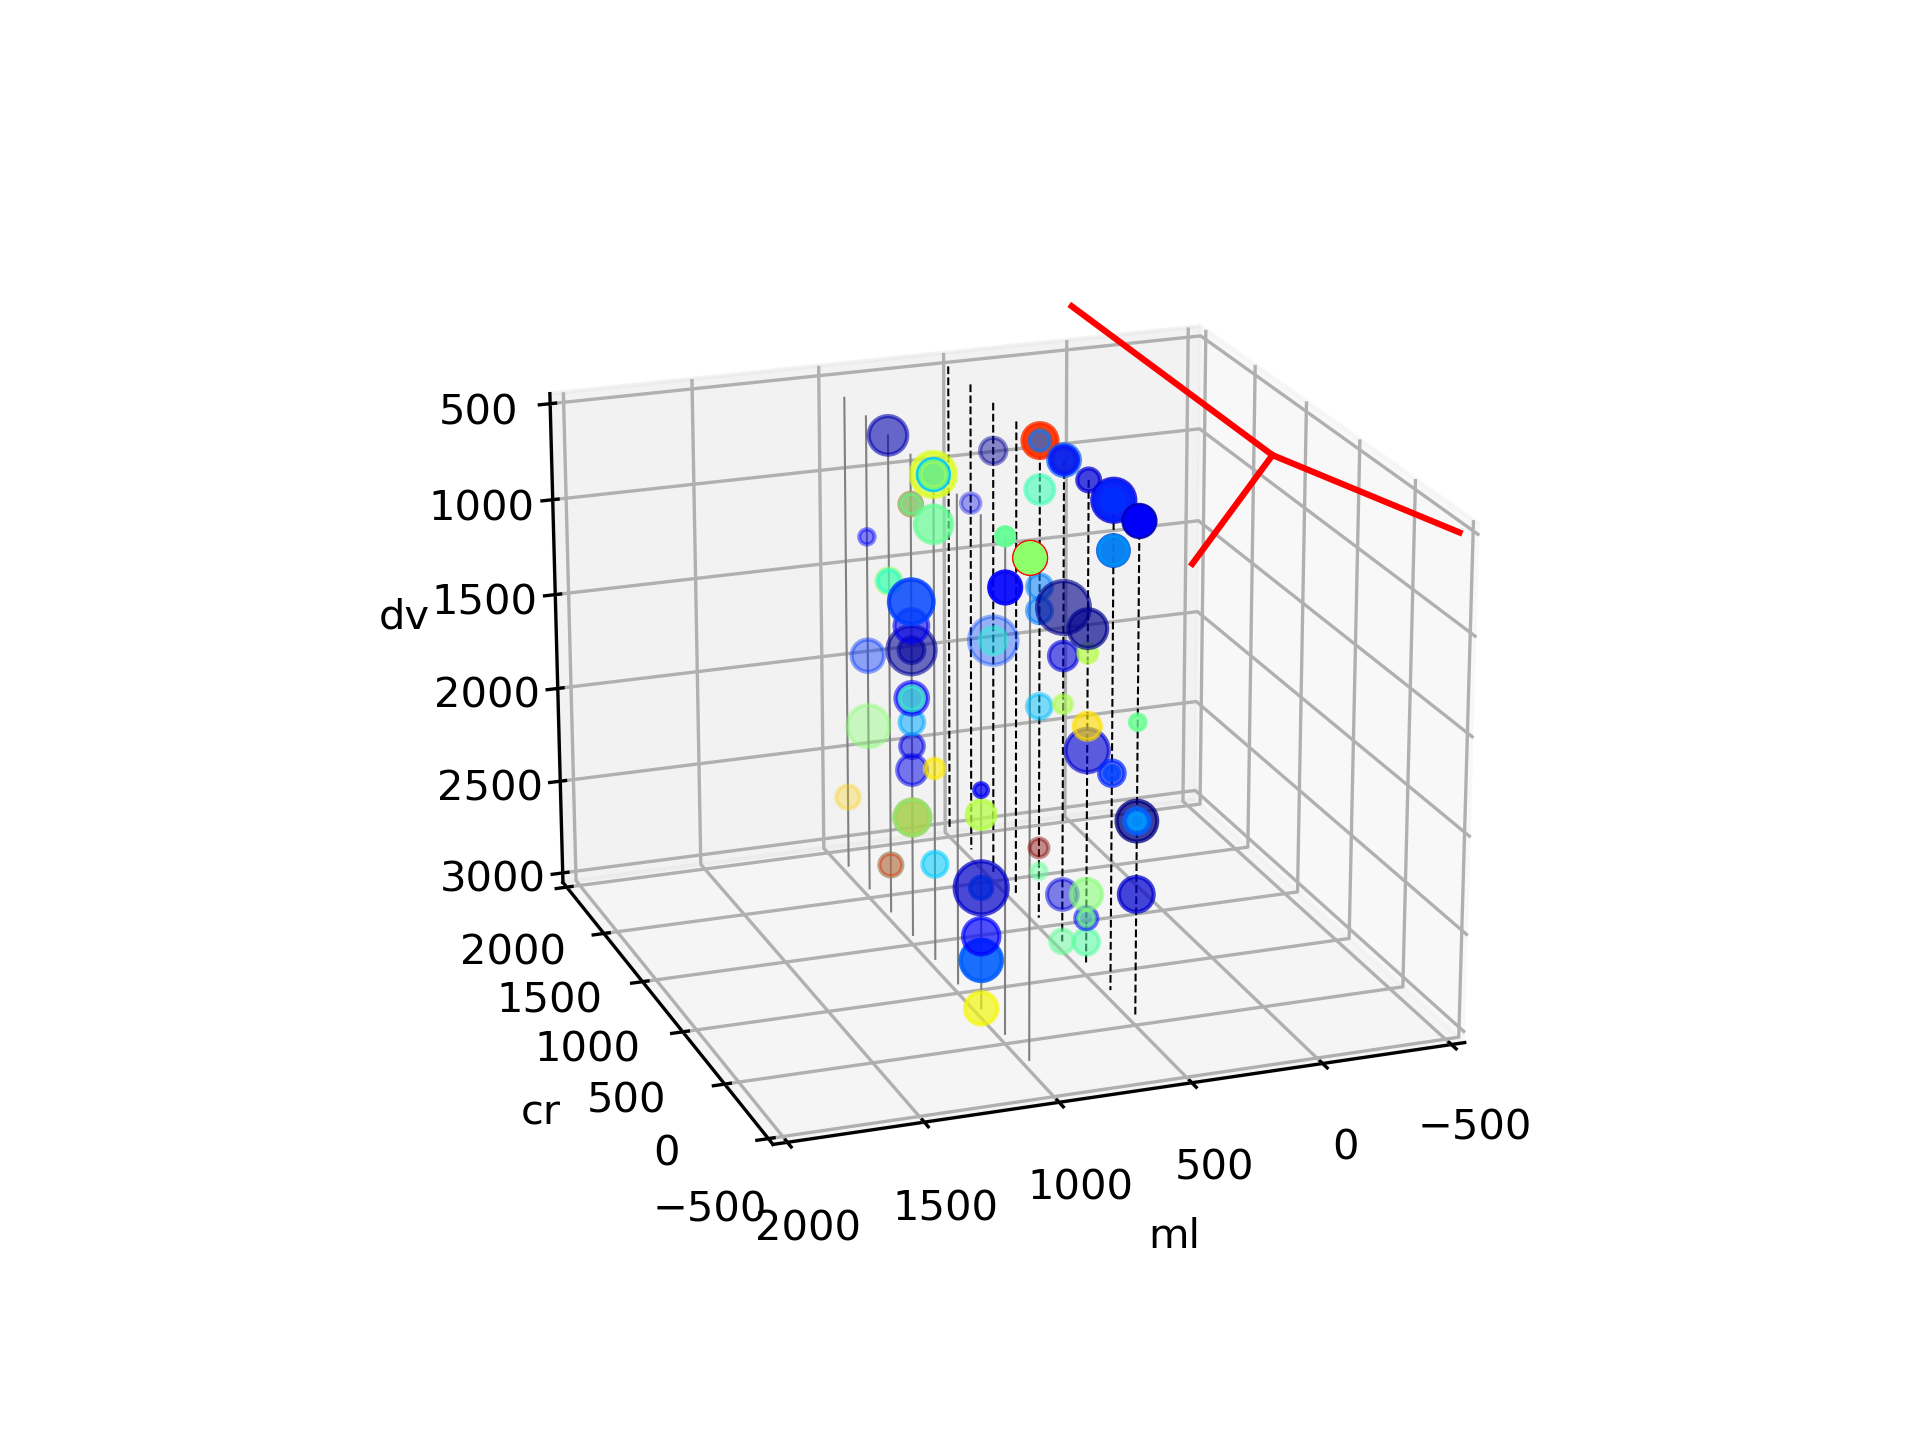

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [12]:
# Make a 3d plot of selectivity Z vs electrode
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection = '3d')

#cmap = plt.get_cmap('YlOrRd')
cmap = plt.get_cmap('jet')

cmin = 0
cmax = 1
cdata = np.array((256*(electrodeH['selectivityZ'].array - cmin)/(cmax-cmin)), dtype=int)
cdata[cdata<0] = 0
cdata[cdata>255] = 255

ax.scatter(electrodeH['xpos']*500, electrodeH['ypos']*250, electrodeH['depth']*250, s=electrodeH['rStd']*10,
           c = cdata, cmap= cmap)

# Plot the electrodes
for irow in range(2):
    for ipos in range(10):
        if ((irow == 0) & (ipos==0)):
            continue
        if ((irow == 1) & (ipos==9)):
            continue
        if (irow==0):
            ax.plot([500, 500], [(ipos-1)*250, (ipos-1)*250], [500, 3000], 'k--', linewidth=0.5)
        elif (irow==1):
            ax.plot([1000, 1000], [(ipos-1)*250, (ipos-1)*250], [500, 3000], '-', color='grey', linewidth=0.5)

# plot the y sinus
ax.plot([0, 0], [0, 2000], [250, 250], 'r')
ax.plot([0, 500], [0, -500], [250, 500], 'r')
ax.plot([0, -500], [0, -500], [250, 500], 'r')

# Set equal scale
ax.set_xlabel('ml')
ax.set_ylabel('cr')
ax.set_zlabel('dv')
ax.view_init(elev = -160, azim=110)
ax.set(xlim=(-500,2000))
ax.set(ylim=(-500,2000))
ax.set(zlim=(500,3000))

plt.savefig('/Users/frederictheunissen/Desktop/selZvsElectrode.eps')



<IPython.core.display.Javascript object>


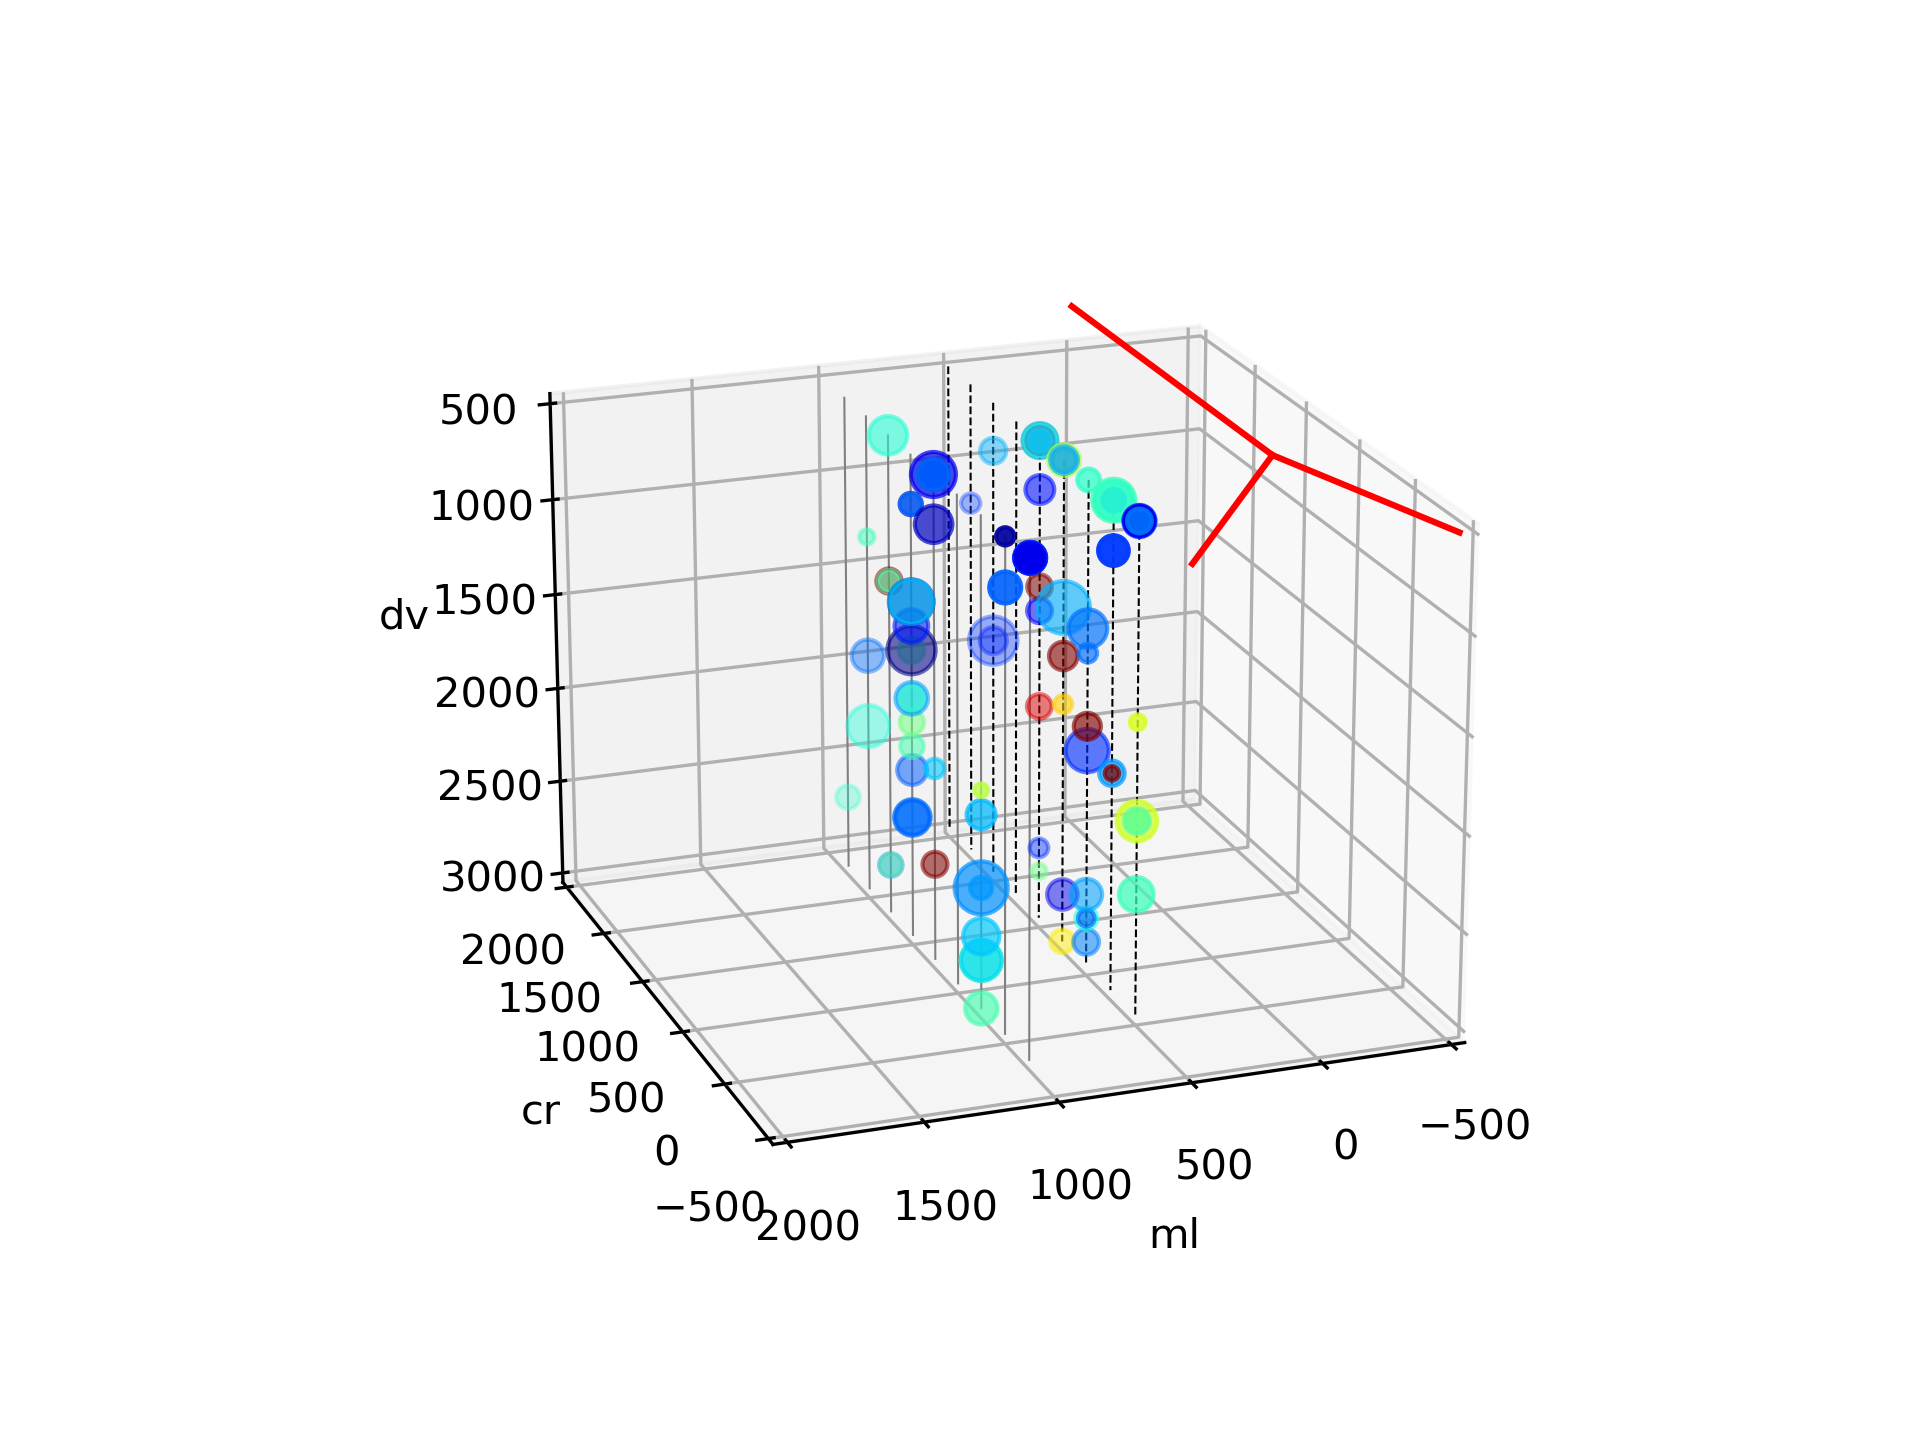

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [13]:
# Make a 3d plot of selectivityH vs electrode
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection = '3d')

#cmap = plt.get_cmap('YlOrRd')
cmap = plt.get_cmap('jet')

cmin = 0
cmax = 0.15
cdata = np.array((256*(electrodeH['selectivityH'].array - cmin)/(cmax-cmin)), dtype=int)
cdata[cdata<0] = 0
cdata[cdata>255] = 255

ax.scatter(electrodeH['xpos']*500, electrodeH['ypos']*250, electrodeH['depth']*250, s=electrodeH['rStd']*10,
           c = cdata, cmap= cmap)

# Plot the electrodes
for irow in range(2):
    for ipos in range(10):
        if ((irow == 0) & (ipos==0)):
            continue
        if ((irow == 1) & (ipos==9)):
            continue
        if (irow==0):
            ax.plot([500, 500], [(ipos-1)*250, (ipos-1)*250], [500, 3000], 'k--', linewidth=0.5)
        elif (irow==1):
            ax.plot([1000, 1000], [(ipos-1)*250, (ipos-1)*250], [500, 3000], '-', color='grey', linewidth=0.5)

# plot the y sinus
ax.plot([0, 0], [0, 2000], [250, 250], 'r')
ax.plot([0, 500], [0, -500], [250, 500], 'r')
ax.plot([0, -500], [0, -500], [250, 500], 'r')

# Set equal scale
ax.set_xlabel('ml')
ax.set_ylabel('cr')
ax.set_zlabel('dv')
ax.view_init(elev = -160, azim=110)
ax.set(xlim=(-500,2000))
ax.set(ylim=(-500,2000))
ax.set(zlim=(500,3000))

plt.savefig('/Users/frederictheunissen/Desktop/selHvsElectrode.eps')




<IPython.core.display.Javascript object>


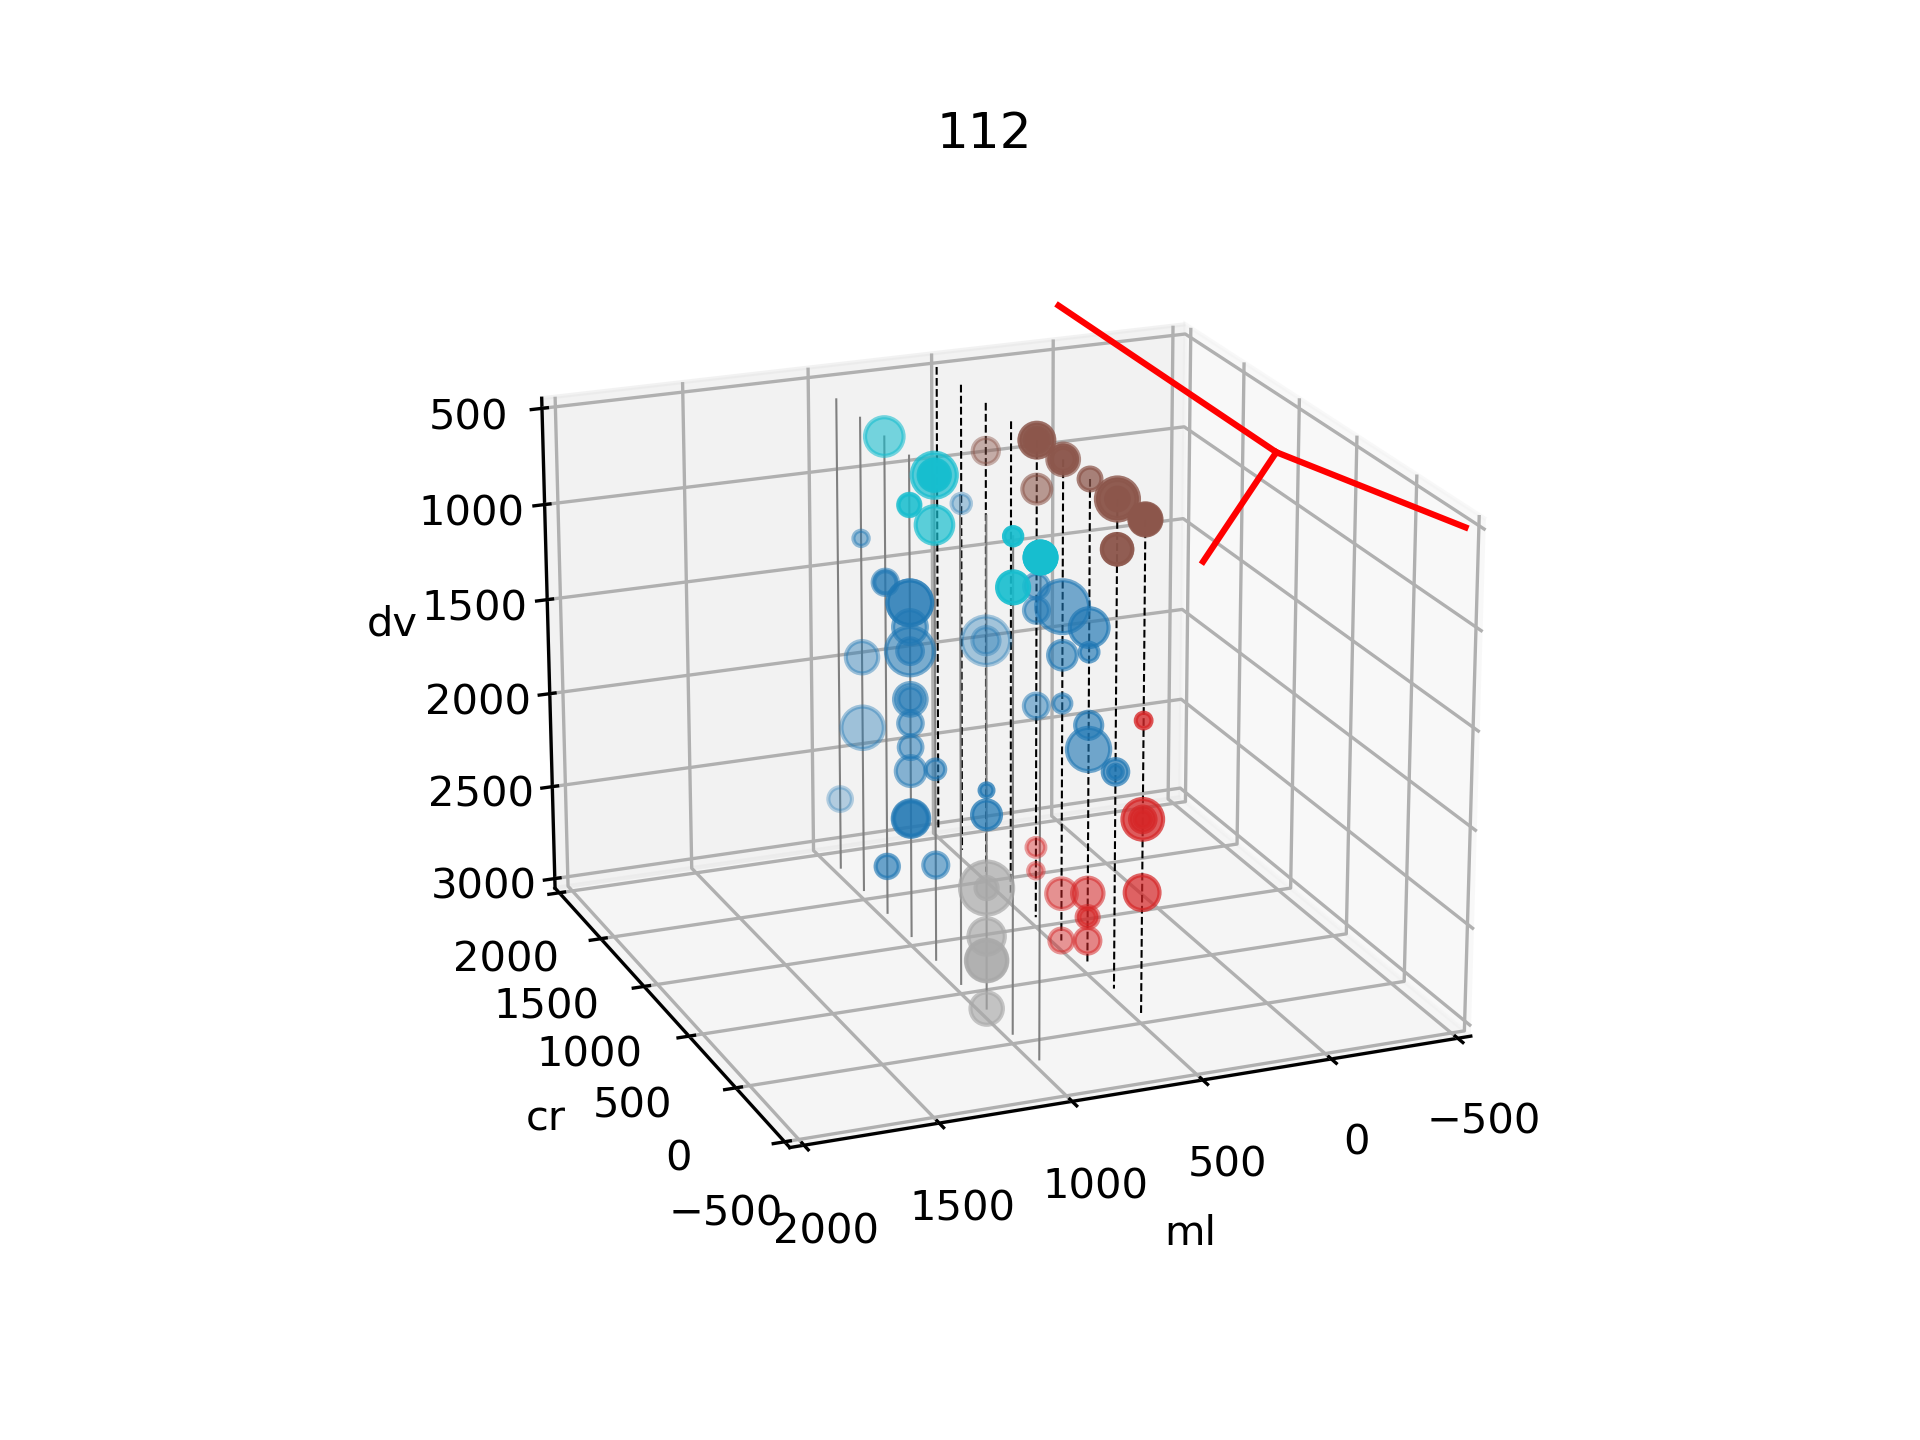

In [52]:
# Make a 3d movie
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection = '3d')

#cmap = plt.get_cmap('YlOrRd')
cmap = plt.get_cmap('jet')


cdata = []
for index, row in electrodeH.iterrows():
    if row['region'] == 'NCM':
        cdata.append('tab:red')
    elif row['region'] == 'CMM':
        cdata.append('tab:brown')
    elif row['region'] == 'CLM':
        cdata.append("tab:cyan")
    elif row['region'] == "L_NCM":
        cdata.append('darkgray')
    else:
        cdata.append('tab:blue')

scPlot = []
scPlot.append(ax.scatter(electrodeH['xpos']*500, electrodeH['ypos']*250, electrodeH['depth']*250, s=electrodeH['rStd']*10,
           c = cdata))

# plot the electrodes
for irow in range(2):
    for ipos in range(10):
        if ((irow == 0) & (ipos==0)):
            continue
        if ((irow == 1) & (ipos==9)):
            continue
        if (irow==0):
            scPlot.append(ax.plot([500, 500], [(ipos-1)*250, (ipos-1)*250], [500, 3000], 'k--', linewidth=0.5))
        elif (irow==1):
            scPlot.append(ax.plot([1000, 1000], [(ipos-1)*250, (ipos-1)*250], [500, 3000], '-', color='grey', linewidth=0.5))



# plot the y sinus
ax.plot([0, 0], [0, 2000], [250, 250], 'r')
ax.plot([0, 500], [0, -500], [250, 500], 'r')
ax.plot([0, -500], [0, -500], [250, 500], 'r')

ax.set_xlabel('ml')
ax.set_ylabel('cr')
ax.set_zlabel('dv')
# ax.view_init(elev = -160, azim=145)
ax.set(xlim=(-500,2000))
ax.set(ylim=(-500,2000))
ax.set(zlim=(500,3000))

def init():
    return scPlot

def animate(i):
    ax.view_init(elev=-160., azim=i)
    ax.set_title(str(i))
    return scPlot

# Animate
anim = animation.FuncAnimation(fig, animate, init_func = init, frames=360, interval=20, blit=True)
# Save - makes the temp png but fails at cleanup time.
anim.save(rootPath+dataPath+'ElectrodeRegion.mp4', fps=30, dpi=300)

# for angle in range(0, 360):
    #ax.view_init(-160, angle)
    #plt.draw()
    #plt.pause(.001)

In [15]:
# Statistics for mean rate

mod = ols('decodingpcc ~ region', data = electrodeH)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            decodingpcc   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2.558
Date:                Sun, 17 Jul 2022   Prob (F-statistic):             0.0436
Time:                        17:50:19   Log-Likelihood:                -212.13
No. Observations:                 100   AIC:                             434.3
Df Residuals:                      95   BIC:                             447.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          14.0085      0.518     

In [42]:
# Statistics for mean rate

mod = ols('rMean ~ region', data = electrodeH)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  rMean   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     2.701
Date:                Sun, 17 Jul 2022   Prob (F-statistic):             0.0351
Time:                        12:51:22   Log-Likelihood:                -260.24
No. Observations:                 100   AIC:                             530.5
Df Residuals:                      95   BIC:                             543.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.1471      0.838     

In [43]:
# Statistics for selectivity z

mod = ols('selectivityZ ~ region', data = electrodeH)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           selectivityZ   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.991
Date:                Sun, 17 Jul 2022   Prob (F-statistic):              0.102
Time:                        12:51:22   Log-Likelihood:                -7.7853
No. Observations:                 100   AIC:                             25.57
Df Residuals:                      95   BIC:                             38.60
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5365      0.067     

In [44]:
# Statistics for selectivity H

mod = ols('selectivityH ~ region', data = electrodeH)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           selectivityH   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     3.547
Date:                Sun, 17 Jul 2022   Prob (F-statistic):            0.00965
Time:                        12:51:23   Log-Likelihood:                 187.91
No. Observations:                 100   AIC:                            -365.8
Df Residuals:                      95   BIC:                            -352.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0365      0.009     

In [16]:
mod = ols('decodingpcc ~ zone', data = electrodeH)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            decodingpcc   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.588
Date:                Sun, 17 Jul 2022   Prob (F-statistic):              0.210
Time:                        17:51:12   Log-Likelihood:                -215.63
No. Observations:                 100   AIC:                             437.3
Df Residuals:                      97   BIC:                             445.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          15.3664      0.867     

In [47]:
# Statistics for mean rate

mod = ols('rMean ~ zone', data = electrodeH.loc[electrodeH['zone'] != 'Border'])
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  rMean   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7507
Date:                Sun, 17 Jul 2022   Prob (F-statistic):              0.389
Time:                        12:51:46   Log-Likelihood:                -230.23
No. Observations:                  94   AIC:                             464.5
Df Residuals:                      92   BIC:                             469.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.3292      0.459      5.070

In [48]:
# Statistics for rate selectivity

mod = ols('selectivityZ ~ zone', data = electrodeH.loc[electrodeH['zone'] != 'Border'])
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           selectivityZ   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1549
Date:                Sun, 17 Jul 2022   Prob (F-statistic):              0.695
Time:                        12:52:02   Log-Likelihood:                -12.186
No. Observations:                  94   AIC:                             28.37
Df Residuals:                      92   BIC:                             33.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3654      0.045      8.089

In [49]:
# Statistics for decoding selectivity

mod = ols('selectivityH ~ zone', data = electrodeH.loc[electrodeH['zone'] != 'Border'])
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           selectivityH   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.059
Date:                Sun, 17 Jul 2022   Prob (F-statistic):              0.306
Time:                        12:52:30   Log-Likelihood:                 167.89
No. Observations:                  94   AIC:                            -331.8
Df Residuals:                      92   BIC:                            -326.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0547      0.007      8.226

In [51]:
# Statistics for decoding selectivity

mod = ols('decodingpcc ~ zone', data = electrodeH.loc[electrodeH['zone'] != 'Border'])
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            decodingpcc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.04946
Date:                Sun, 17 Jul 2022   Prob (F-statistic):              0.825
Time:                        12:53:32   Log-Likelihood:                -185.37
No. Observations:                  94   AIC:                             374.7
Df Residuals:                      92   BIC:                             379.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.8309      0.285     48.515